# Снижение размерности векторной модели

**Cнижение размерности** — это преобразование данных, состоящее в уменьшении числа переменных путём получения главных переменных.

![](http://www.sociologos.ru/upload/Image/scaling.jpg)

### Зачем это нужно в  NLP?

1. Чтобы изображать данные на плоскости
2. Исследование больших неразмеченных массивов текстовых данных (анализ трендов, тематическое моделирование и т.д.)


## Сингулярное разложение 

**Сингулярное разложение** *(Singular Value Decomposition, SVD)* — декомпозиция вещественной матрицы с целью ее приведения к каноническому виду (≈ максимально простому, идеальный случай — диагональная матрица).

Сингулярным разложением матрицы $A$ порядка $m \times n$ является разложение следующего вида:

$A=U\Sigma V^{T}$,

где $\Sigma$ — матрица размера $m\times n$ с неотрицательными элементами, у которой элементы, лежащие на главной диагонали — это сингулярные числа (а все элементы, не лежащие на главной диагонали, являются нулевыми), а матрицы $U$ (порядка $m$) и $V$ (порядка $n$) — это две унитарные матрицы, состоящие из левых и правых сингулярных векторов соответственно (а $V^{T}$ — это сопряжённо-транспонированная матрица к $V$). 

[Подробнее тут](http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5).

<img src='img/svd.png' width=500>

## PCA

**PCA** *(principal component analysis)* — метод главных компонент, изобретен К. Пирсоном еще в 1901 г. Вычисление главных компонент сводится либо к вычислению собственных векторов и собственных значений ковариационной матрицы исходных данных, либо к сингулярному разложению матрицы. Реализован в `sklearn`, [вот документация](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA).

Подробнее об алгоритме [вот тут](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82) (осторожно, много формул!)

<img src='https://cdn-images-1.medium.com/max/1200/1*vfLvJF8wHaQjDaWv6Mab2w.png' width=500>

## LSA (LSI)

**LSA** *(latent semantic analysis, латентный семантический анализ)*, он же **LSI** *(latent semantic indexing, латентное семантическое индексирование)* — это вообще-то простейший метод тематического моделирования, но используется он в основном для снижения размерности. Первый шаг — tf-idf преобразование, второй шаг — SVD. Подробнее о работе алгоритма см. в тетрадке <a href="./3. Topic Modelling.ipynb">Topic Modelling</a>.

В `sklearn` называется `TruncatedSVD`, [документация вот](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html). 

## t-SNE

**t-SNE**  (*t-distributed Stochastic Neighbor Embedding*, стохастическое вложение соседей с t-распределением) — техника нелинейного снижения размерности и визуализации многомерных переменных. Она разработана специально для данных очень высокой размерности Л. ван дер Маатеном и Д. Хинтоном, [вот их статья](http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf). Но t-SNE — это не только метод снижения размерности, это еще и метод исследования больших данных, поиска в них групп и закономерностей.

В чем преимущество t-SNE по сравнению с PCA? Как и прочие линейные методы снижения размерности, PCA плохо справится с проекцией на плоскость датасетов вроде этого. Сплошной линией показана закономерность в данных, которую обнаружит t-SNE, но не найдет PCA (который, в свою очередь, "схлопнет" данные по пунктирной линии). С другой стороны, линейные преобразования гораздо быстрее!

![](https://qph.fs.quoracdn.net/main-qimg-725067b13a3d663fa1c373fa97e026bd)

На хабре есть хорошая [статья](https://habr.com/ru/post/267041/), где объясняется математический смысл и принцип работы t-SNE. Вот псевдокод из этой статьи. Формулы, которые в нем упоминаются, приведены ниже.

    Data: набор данных X = {x1, x2, …, xn},
    параметр функции потерь: перплексия Perp,
    Параметры оптимизации: количество итераций T, скорость обучения η, момент α(t).
    Result: представление данных Y(T) = {y1, y2, …, yn} (в 2D или 3D).
    begin
        вычислить попарное сходство pj|i c перплексией Perp (используя формулу 1)
        установить pij = (pj|i + pi|j)/2n
        инициализировать Y(0) = {y1, y2, …, yn} точками нормального распределения (mean=0, sd=1e-4)
        for t = 1 to T do
            вычислить сходство точек в пространстве отображения qij (по формуле 2)
            вычислить градиент δCost/δy (по формуле 3)
            установить Y(t) = Y(t-1) + ηδCost/δy + α(t)(Y(t-1) - Y(t-2))
        end
    end


#### Функция потерь
Если точки отображения $Y_i$ и $Y_j$ корректно моделируют сходство между исходными точками высокой размерности $X_i$ и $X_j$, то соответствующие условные вероятности $p_{j|i}$ и $q_{j|i}$ будут эквивалентны. В качестве очевидной оценки качества, с которым $q_{j|i}$ отражает $p_{j|i}$, используется дивергенция или расстояние Кульбака-Лейблера. SNE минимизирует сумму таких расстояний для всех точек отображения при помощи градиентного спуска. 

$\operatorname{cost}=K L(P \| Q)=\sum_{i} \sum_{j} p_{i j} \log \frac{p_{i j}}{q_{i j}}$

<img src="./img/tsne.gif" width=400 align="right">

#### Формула №1
Преобразование многомерного евклидова расстояния между точками в условные вероятности, отражающие сходство точек.

$p_{j | i}=\frac{\exp \left(-\left\|x_{i}-x_{j}\right\|^{2} / 2 \sigma_{i}^{2}\right)}{\sum_{k \neq i} \exp \left(-\left\|x_{i}-x_{k}\right\|^{2} / 2 \sigma_{i}^{2}\right)}$

#### Формула №2
Вычисляем сходство точек в пространстве отображения, используя t-распределение с одной степенью свободы. 

$q_{i j}=\frac{\left(1+\left\|y_{i}-y_{j}\right\|^{2}\right)^{-1}}{\sum_{k \neq l}\left(1+\left\|y_{k}-y_{l}\right\|^{2}\right)^{-1}}$

#### Формула №3
А вот так в данном случае рассчитывается градиент.

$\frac{\partial C o s t}{\partial y_{i}}=4 \sum_{j}\left(p_{i j}-q_{i j}\right)\left(y_{i}-y_{j}\right)\left(1+\left\|y_{i}-y_{j}\right\|^{2}\right)^{-1}$

***

В [статье](https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1) на *towardsdatascience* все это описано более простым языком и с примерами на питоне, но по-английски. 

[Анимация](./img/tsne.gif) — визуализация работы t-SNE на классическом [датасете рукописных цифр](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits).

### Другие методы

Методов разложения матриц и снижения размерности [немало](https://en.wikipedia.org/wiki/Dimensionality_reduction) (в `sklearn` реализовано [вот что](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)), но в компьютерной лингвистике пользуются, как правило, названными выше — особенно PCA и LSA.


# Case study: кластеризация

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" width=600 align="right">


Снижение размерности пригодится нам, например, для **визуализации результатов кластерного анализа**. Конечно, существуют различные метрики оценки качества кластеризации (см. ниже), однако удобнее всего оценивать кластеры глазами. А чтобы их визуализировать, необходимо снизить размерность до 2 или 3. 

Попробуем на примере все тех же *20newsgroups*.

Некоторые алгоритмы кластеризации ([вот очень хорошее описание](https://scikit-learn.org/stable/modules/clustering.html#clustering) из документации `sklearn`):

* [K-Means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
* [Mini-Batch K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans)
* [Spectral Clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering)
* [Hierarchical Agglomerative Clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)
* [Affinity Propagation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html#sklearn.cluster.AffinityPropagation)
* [MeanShift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift)
* [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)



### Лирическое отступление: что можно включить в Pipeline

Это справедливо не только для кластерзации, но и, например, для классификации.

* [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) – векторизация
    * max_df – максимальная документная частота 
    * max_features – максимальное количество признаков
    * min_df – минимальная документная частота
    * ngram_range – интервал для $n$-грам
    * analyzer –  задает элемент текста {‘word’, ‘char’, ‘char_wb’}  
    * stop_words – стоп-слова
* [TfidfTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) – $tf-idf$ преобразование
    * можно не использовать
    * можно вместо *CountVectorizer* сразу использовать *TfidfVectorizer*
* Снижение размерности (для визуализации)
    * [TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) – сингулярное разложение (а именно LSA)
    * [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (метод главных компонент)
* [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html) – нормировка (сумма по столбцу будет равна 1)
    * можно не использовать
* Последний этап – какой-либо алгоритм кластеризации/классификации/etc. (можно выбрать любой, в примере ниже – KMeans)

Необязательно включать все этапы в пайплайн, можно выполнять их и по-отдельности. 

**NB!** Все ссылки ведут на документацию `sklearn`.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
from sklearn.pipeline import *
from sklearn.metrics import *
from sklearn.cluster import *
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import *
from sklearn.decomposition import TruncatedSVD, PCA

from sklearn.datasets import fetch_20newsgroups

In [4]:
cats = ['talk.religion.misc', 'sci.space', 'talk.politics.mideast', 'comp.graphics']

dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, categories=cats)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

data = dataset.data
labels = dataset.target

3528 documents
4 categories


In [5]:
dataset.target_names

['comp.graphics', 'sci.space', 'talk.politics.mideast', 'talk.religion.misc']

Векторизуем данные.

In [58]:
vect = TfidfVectorizer(max_df=0.9, min_df=5, ngram_range=(1,3), analyzer='word', stop_words ='english')
X = vect.fit_transform(data)
X.shape

(3528, 37147)

K-Means требует указать количество кластеров. Предположим, что их число равно числу тем, по которым разделены наши документы. Это *наивное* предположение, которое вовсе необязательно подтвердится!

In [59]:
n_clusters = len(dataset.target_names)
clf = KMeans(n_clusters=n_clusters)

%time result = clf.fit_predict(X)

Wall time: 3min 2s


### Оценка качества кластеризации

Измерить качество по одной из следующих метрик можно только если известны настоящие метки документов. 

* [Homogenity Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score)
* [Completeness Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score)
* [V-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score)
* [Adjusted Rand-Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score)
* [Adjusted Mutual Information](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score)

In [66]:
print("Homogeneity:", homogeneity_score(labels, clf.labels_))
print("Completeness:", completeness_score(labels, clf.labels_))
print("V-measure",  v_measure_score(labels, clf.labels_))
print("Adjusted Rand-Index:",  adjusted_rand_score(labels, clf.labels_))
print("Adjusted Mutual Information:",  adjusted_mutual_info_score(labels, clf.labels_))

Homogeneity: 0.2400070708592068
Completeness: 0.437455181573136
V-measure 0.30995774712048996
Adjusted Rand-Index: 0.09697857308258175
Adjusted Mutual Information: 0.23929663571797505


## Снижение размерности и визуализация

Ну наконец-то мы добрались до того, ради чего это все было!

**Важно!** Несморя на то, что разные методы снижения размерности дадут разные картинки, результаты кластеризации от этого никак не изменятся! Мы просто видим различные проекции наших данных на плоскость, а присвоенные им метки классов/кластеров от этого не меняются.

## PCA

In [8]:
pca = PCA(n_components=2)
X_2D_PCA = pca.fit_transform(X.todense())
centers = pca.transform(clf.cluster_centers_)

In [68]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

def draw_subplots(data, colors, plotname, n_clusters, plot_centers=True, 
                  cmap='viridis', header='Clustering example'):
    plot = plotname
    
    # рисуем нули
    plot.axhline(0, color='#afafaf')
    plot.axvline(0, color='#afafaf')
    
    # рисуем точки
    for i in range(n_clusters):
        try:
            plot.scatter(data[i:,0], X_2D_PCA[i:,1], s=30, c=colors, cmap=cmap)
        except (KeyError, ValueError) as e: # костыль для бага матплотлиба
            pass
  
    # рисуем центроиды
    if plot_centers == True:
        plot.scatter(centers[:,0], centers[:,1], marker="x", c='r')
    
    # подписи осей
    plot.set_xlabel('Principal Component 1')
    plot.set_ylabel('Principal Component 2')
    
    # заголовок
    plot.set_title(header)

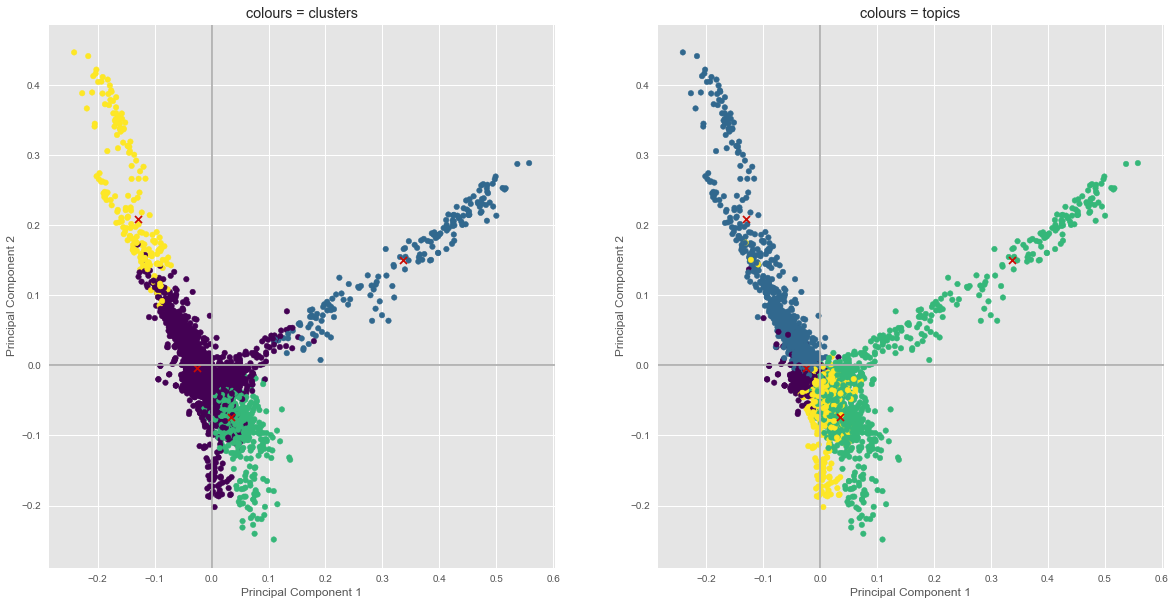

In [69]:
# рисуем сабплоты
fig, ((plot1, plot2)) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(20, 10))

# цвета = кластеры
draw_subplots(X_2D_PCA, clf.labels_, plot1, n_clusters, header='colours = clusters')

# цвета = темы
draw_subplots(X_2D_PCA, labels, plot2, n_clusters, header='colours = topics')


## LSA (TruncatedSVD)

В отличие от PCA, не высчитывает центры кластеров.

In [73]:
svd = TruncatedSVD(n_components=2)
X_2D_SVD = svd.fit_transform(X.todense())

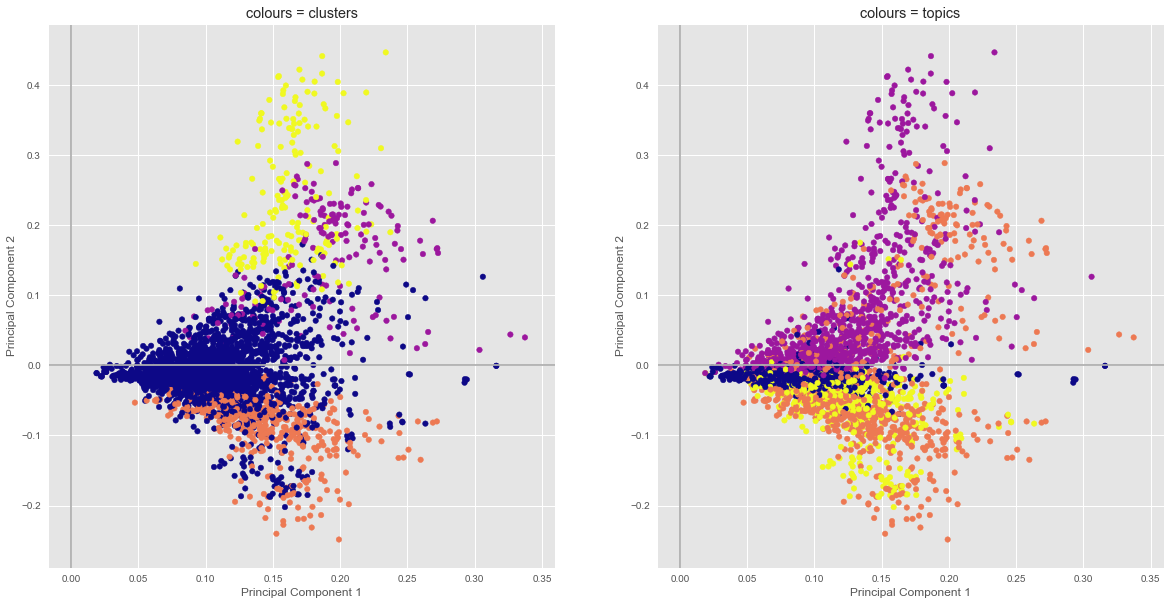

In [74]:
# рисуем сабплоты
fig, ((plot1, plot2)) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(20, 10))

# цвета = кластеры
draw_subplots(X_2D_SVD, clf.labels_, plot1, n_clusters, header='colours = clusters', cmap='plasma', plot_centers=False)

# цвета = темы
draw_subplots(X_2D_SVD, labels, plot2, n_clusters, header='colours = topics', cmap='plasma', plot_centers=False)


## t-SNE

### Способ №1: sklearn

Считается достаточно долго, т.к. каждый вектор сравнивается со всеми остальными векторами и высчитывается расстояние между ними. Зато при снижении размерности бонусом получаем кластеры! Но только визуально, т.к. t-SNE все-таки не алгоритм кластеризации и никакие метки документам не присваивает. 


Раскрасим точки в соответствии с темами, указанными в датасете (но можно было бы и в соответствии с кластерами, найденными KMeans или любым другим алгоритмом). На всякий случай: каждая точка = документ.

In [75]:
from sklearn.manifold import TSNE

%time X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X.todense())

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3528 samples in 7.947s...
[t-SNE] Computed neighbors for 3528 samples in 908.471s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3528
[t-SNE] Computed conditional probabilities for sample 2000 / 3528
[t-SNE] Computed conditional probabilities for sample 3000 / 3528
[t-SNE] Computed conditional probabilities for sample 3528 / 3528
[t-SNE] Mean sigma: 0.430297
[t-SNE] Computed conditional probabilities in 0.259s
[t-SNE] Iteration 50: error = 81.7880020, gradient norm = 0.0101091 (50 iterations in 3.547s)
[t-SNE] Iteration 100: error = 81.7879410, gradient norm = 0.0098985 (50 iterations in 3.479s)
[t-SNE] Iteration 150: error = 81.7880096, gradient norm = 0.0102315 (50 iterations in 3.098s)
[t-SNE] Iteration 200: error = 81.7881775, gradient norm = 0.0110774 (50 iterations in 2.693s)
[t-SNE] Iteration 250: error = 81.7883377, gradient norm = 0.0118247 (50 iterations in 2.205s)
[t-SNE] KL divergence after 250 iter

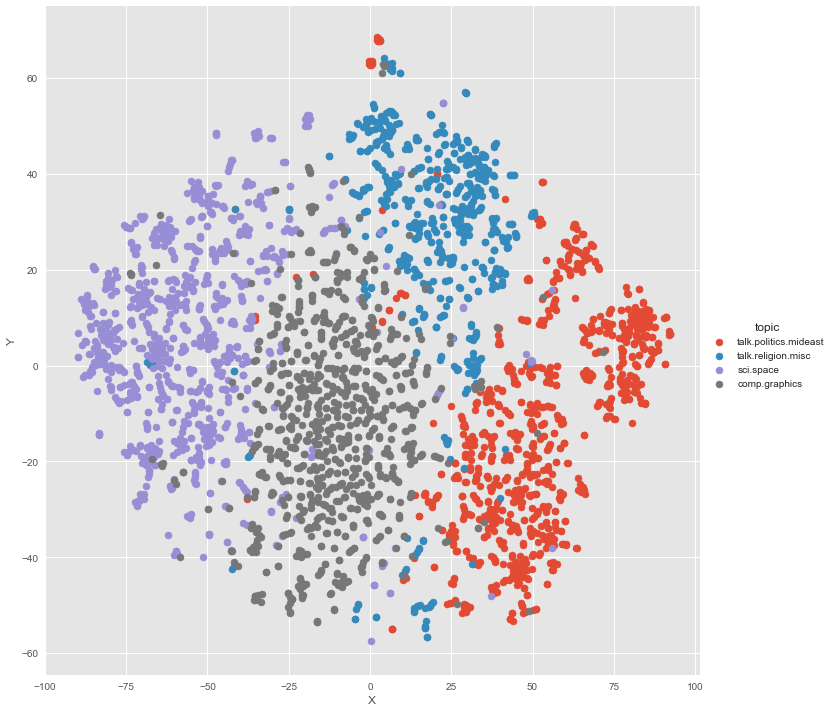

In [76]:
import seaborn as sns

topics = [dataset.target_names[t] for t in labels]

df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : topics})
sns.FacetGrid(df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

### PCA/LSA + t-SNE

Можно сначала немного снизить размерность с помощью PCA/LSA, а затем завершить преобразование с помощью t-SNE. Пишут, что это улучшает качество — судя по картинкам и правда. :)

In [77]:
svd50 = TruncatedSVD(n_components=50)
X_50_SVD = svd50.fit_transform(X.todense())
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_50_SVD)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3528 samples in 0.008s...
[t-SNE] Computed neighbors for 3528 samples in 1.370s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3528
[t-SNE] Computed conditional probabilities for sample 2000 / 3528
[t-SNE] Computed conditional probabilities for sample 3000 / 3528
[t-SNE] Computed conditional probabilities for sample 3528 / 3528
[t-SNE] Mean sigma: 0.082348
[t-SNE] Computed conditional probabilities in 0.240s
[t-SNE] Iteration 50: error = 80.2462769, gradient norm = 0.0249490 (50 iterations in 3.792s)
[t-SNE] Iteration 100: error = 75.9739685, gradient norm = 0.0030237 (50 iterations in 2.164s)
[t-SNE] Iteration 150: error = 75.8326416, gradient norm = 0.0033210 (50 iterations in 2.169s)
[t-SNE] Iteration 200: error = 75.7944183, gradient norm = 0.0013852 (50 iterations in 2.196s)
[t-SNE] Iteration 250: error = 75.7665176, gradient norm = 0.0054560 (50 iterations in 2.078s)
[t-SNE] KL divergence after 250 iterat

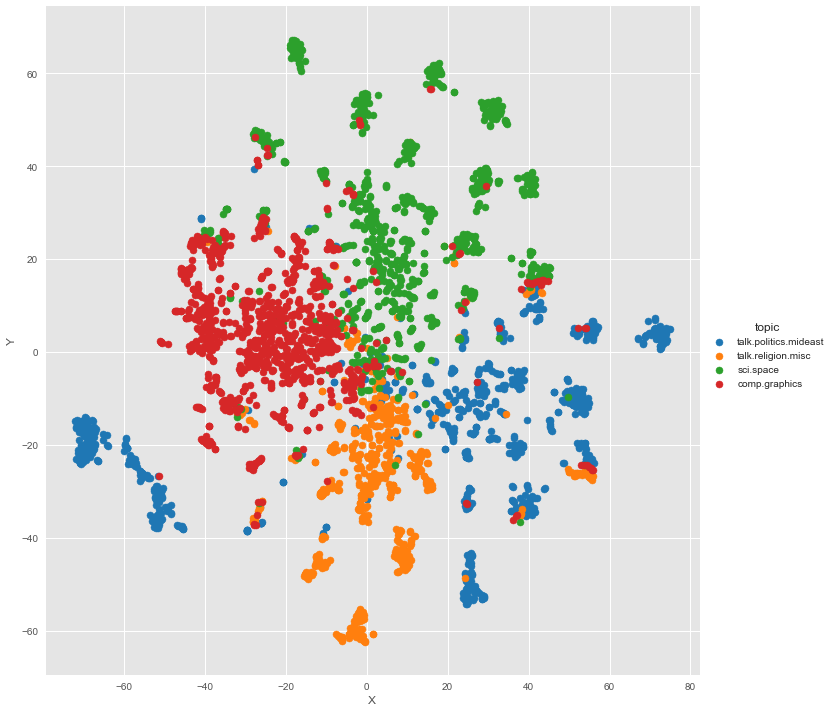

In [78]:
sns.set_palette('tab10')

# достаем названия тем по их номерам
topics = [dataset.target_names[t] for t in labels]

df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : topics})
sns.FacetGrid(df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

In [82]:
pca30 = PCA(n_components=30)
X_30_PCA = pca30.fit_transform(X.todense())
X_embedded_2 = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_30_PCA)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3528 samples in 0.005s...
[t-SNE] Computed neighbors for 3528 samples in 0.970s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3528
[t-SNE] Computed conditional probabilities for sample 2000 / 3528
[t-SNE] Computed conditional probabilities for sample 3000 / 3528
[t-SNE] Computed conditional probabilities for sample 3528 / 3528
[t-SNE] Mean sigma: 0.050218
[t-SNE] Computed conditional probabilities in 0.280s
[t-SNE] Iteration 50: error = 79.1242676, gradient norm = 0.0422618 (50 iterations in 2.966s)
[t-SNE] Iteration 100: error = 73.1206818, gradient norm = 0.0038633 (50 iterations in 2.161s)
[t-SNE] Iteration 150: error = 72.9087753, gradient norm = 0.0021130 (50 iterations in 2.146s)
[t-SNE] Iteration 200: error = 72.5751343, gradient norm = 0.0043363 (50 iterations in 2.125s)
[t-SNE] Iteration 250: error = 72.5397339, gradient norm = 0.0009239 (50 iterations in 2.096s)
[t-SNE] KL divergence after 250 iterat

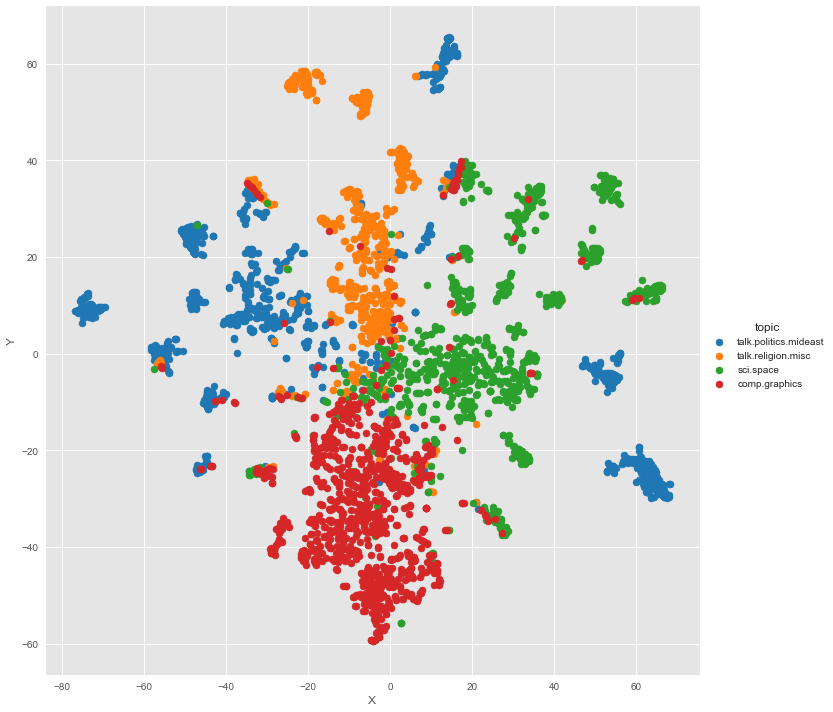

In [83]:
df = pd.DataFrame({'X': X_embedded_2[:, 0], 'Y': X_embedded_2[:, 1], 'topic' : topics})
sns.FacetGrid(df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

### Способ №2: yellowbrick

[Документация](http://www.scikit-yb.org/en/latest/api/text/tsne.html) реализации этого алгоритма из библиотеки `yellowbrick`.

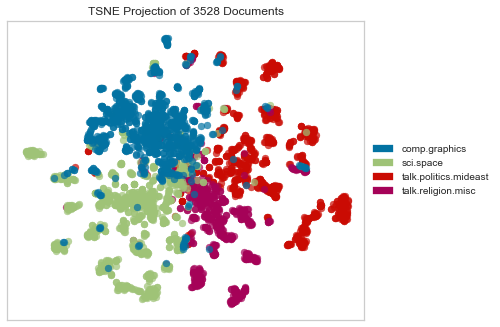

In [65]:
import yellowbrick
from yellowbrick.text import TSNEVisualizer

# В X все еще лежит векторизованный корпус 
tsne = TSNEVisualizer()
tsne.fit(X, topics)
tsne.poof()

# Задание

1. Проделайте все то же самое с другим набором тем. Хорошо ли отделяются друг от друга близкие темы (например, 'sci.crypt',  'sci.electronics',  'sci.med',  'sci.space')? Соответствует ли количество тем количеству кластеров, или же кластеров на глаз больше/меньше? 
2. Задайте побольше классов (например, 20) в KMEans, а потом преобразуйте данные с помощью t-SNE и раскрасьте точки на графике в соответствии с полученными из KMeans кластерами. Насколько результаты кластеризации совпадают с проекцией t-SNE?